# Лабораторная работа №1 

## Методы нулевого и первого порядка 
***

Команда **"Зелёные шапки"** в составе: Заречнев Алексей, Петрасюк Алексей, Халили Алина, Галимова Ярослава (счастливые обитатели группы M3236)  
Ссылка на репозиторий: 
***

Метод градиентного спуска — численный метод нахождения локального минимума или максимума функции с помощью движения вдоль градиента с различными стратегиями выбора шага. В ходе этой лабораторной работы были написаны несколько классов, реализующих удобный интерфейс для анализа функций методами градиентного спуска и одномерного поиска.

Метод градиентного спуска реализован в классе ```gradient_decent.py``` с помощью метода ```find_min``` :

In [ ]:
def find_min(self, start: List[float], max_iterations: int) -> float:
    self.__init(start)
        for i in range(max_iterations):
            h = self.learning_rate_scheduling(self.x, i, self.f)
            self.path.append(self.x)
            grad = gradient(self.f, self.x, self.eps)
            xx = []
            for j in range(len(self.x)):
                coord = self.x[j] - h * grad[j]
                coord = max(coord, self.bounds[j][0])
                coord = min(coord, self.bounds[j][1])
                xx.append(coord)
            if self.x == xx:
                break
            self.x = xx
        return self.f(self.x)

```start: List[float]``` - стартовая точка, в которой начнём поиск  
```max_iterations: int``` - максимальное количество итераций спуска (выполняет свойство предохранителя и запрещает нашему коду выполняться бесконечно долго)
Возвращаемое значение - минимум полученный в ходе спуска  

Аналогичным образом определена функция ```find_max```

Для того, чтобы наглядно промедонстрировать работоспособность кода, также была создана вспомогательная программа ```graphics_plotter.py```, которая помогает нам рисовать красивые 2d и 3d графики.

Давайте проанализируем работу этого методы на конкретных примерах:

In [26]:
from graphics_plotter import GraphicsPlotter
from gradient_decent import GradientDecent
from lrs import constant

+ Первой функцией возьмём обычный многочлен от двух переменных $x^2 + 3y^2 + xy - 1$ и сделаем градиентный спуск с постоянным методом планирования шага  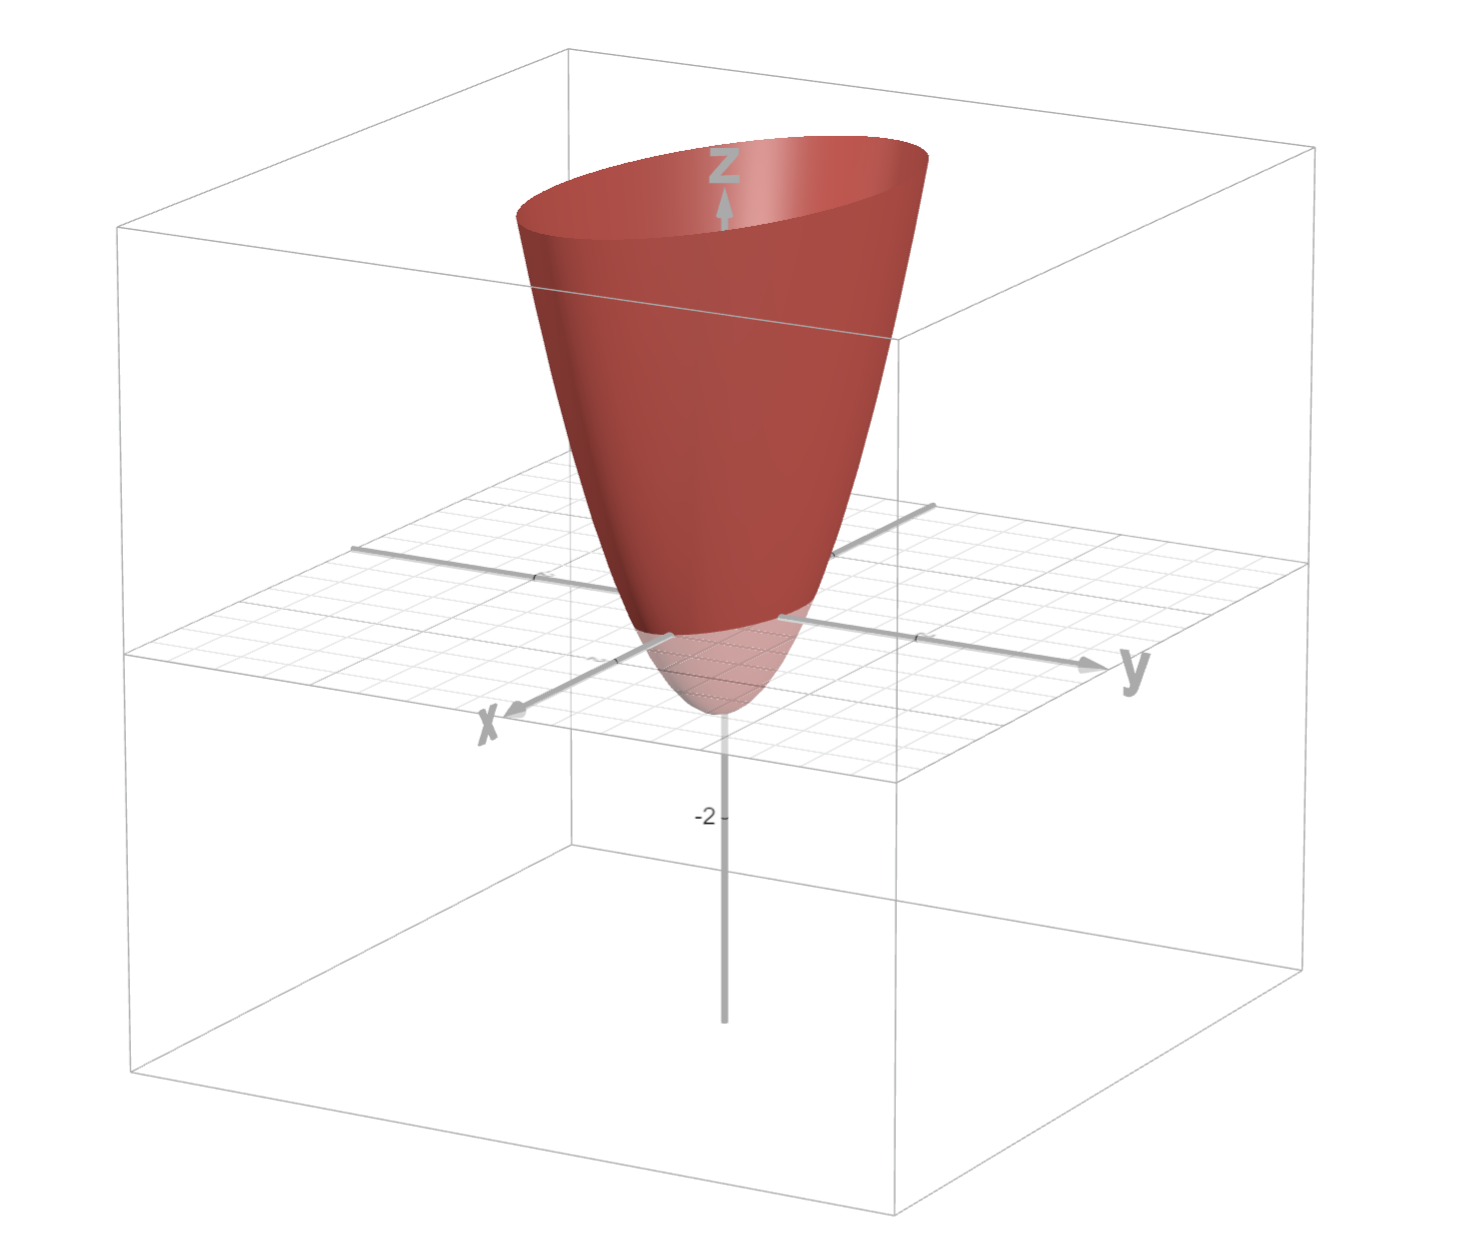

-0.9999999121823524


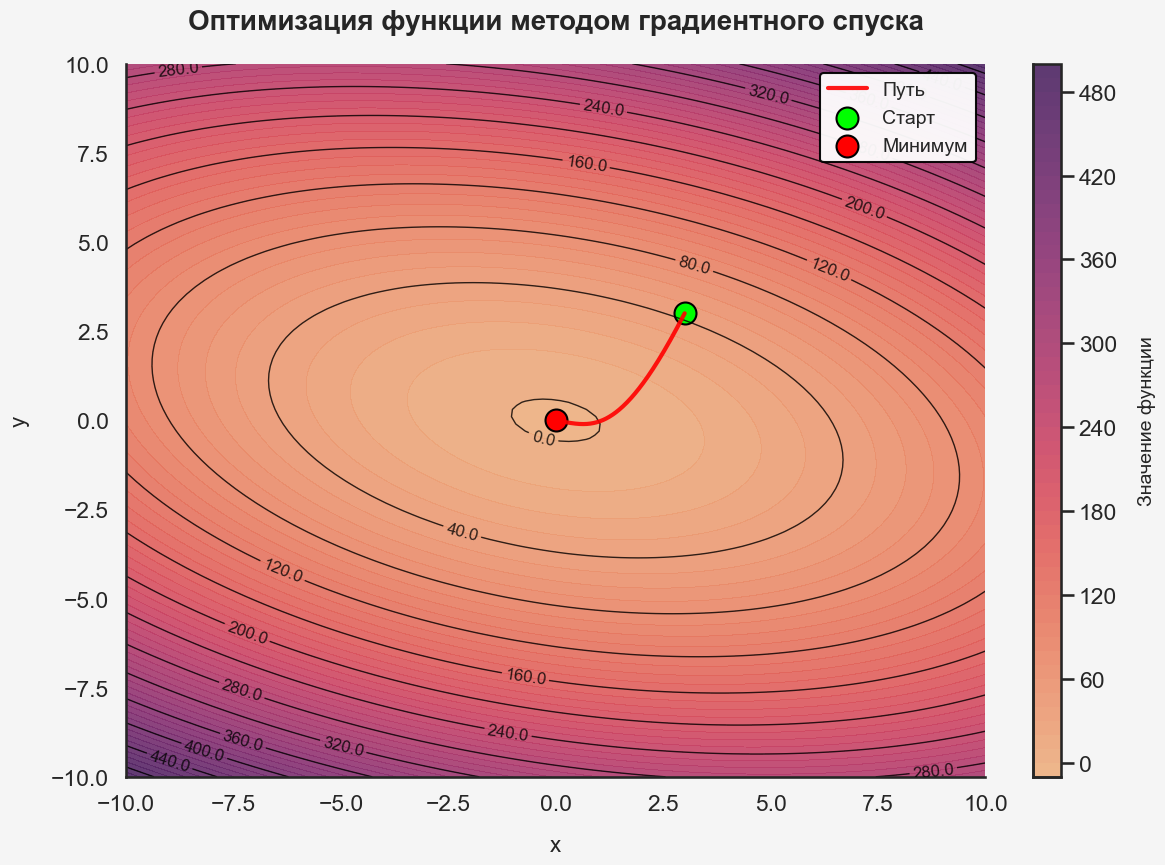

In [60]:
func = lambda x: x[0] ** 2 + 3 * x[1] ** 2 + x[1] * x[0] - 1
test_descent = GradientDecent(constant(0.005), func, [[-10.0, 10.0], [-10.0, 10.0]], 0.00001)

print(test_descent.find_min([3, 3], 1000))

test_plotter = GraphicsPlotter(test_descent)

test_plotter.plot()

Что произошло? Если выставить большую константу (например, мы рассматривали случай с ```constant(0.5)```), высок риск "гулять" по области значения в произвольных направлениях. Например, даже если встать изначально в точку, достаточно близкую к минимуму, то уже спустя ~15 шагов визуально на графике будет видно, как мы сдвинулись на небольшой вектор. Это происходит из-за того, что градиент считается с погрешностью, и даже небольшая погрешность, умножаясь на большую константу, отдаляет нас от искомой точки. Если сделать ~50 шагов, то "прогулка" по нашей области станет совсем далека от истины. В этом случае метод работает некорректно. Следовательно, константу нужно подбирать меньше. Нас удовлетворил показатель ```constant(0.005)```. Но и здесь есть нюансы, из-за небольшой константы наши шаги тоже становятся маленькими, поэтому даже 100 итераций не хватает, чтобы дойти до точки минимума. Но, подняв количество допустимых шагов до 1000, мы получаем ответ -0.9999999121823524, который очень близок к правильному (-1).

+ Мы поняли, что метод градиентного спуска с помощью постоянного планирования шага не является оптимальным: при большой константе он выдаёт абсолютно неверную траекторию и неправилньый ответ, а в случае с маленькой константой ему требуется много итераций. Давайте рассмотрим ещё один метод.